In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
import sqlite3
conn = sqlite3.connect('../data/hist_prices.db')
c = conn.cursor()

In [3]:
data = pd.read_sql('''SELECT * FROM chain_link''', conn)
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Chainlink,LINK,2017-09-21 23:59:59,0.207892,0.155292,0.189132,0.169680,2126270.0,59388000.0
1,2,Chainlink,LINK,2017-09-22 23:59:59,0.181675,0.139869,0.169826,0.150503,1423220.0,52676050.0
2,3,Chainlink,LINK,2017-09-23 23:59:59,0.157440,0.126297,0.149562,0.131129,1186670.0,45895150.0
3,4,Chainlink,LINK,2017-09-24 23:59:59,0.190250,0.130275,0.131110,0.170278,1025740.0,59597300.0
4,5,Chainlink,LINK,2017-09-25 23:59:59,0.182637,0.158580,0.170636,0.182198,1021370.0,63769300.0


In [4]:
# Add some more features derived from the exiting ones
data['Range'] = data.High - data.Low
data['Difference'] = data.Close - data.Open

In [5]:
data.drop(labels='SNo', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        1385 non-null   object 
 1   Symbol      1385 non-null   object 
 2   Date        1385 non-null   object 
 3   High        1385 non-null   float64
 4   Low         1385 non-null   float64
 5   Open        1385 non-null   float64
 6   Close       1385 non-null   float64
 7   Volume      1385 non-null   float64
 8   Marketcap   1385 non-null   float64
 9   Range       1385 non-null   float64
 10  Difference  1385 non-null   float64
dtypes: float64(8), object(3)
memory usage: 119.1+ KB


In [6]:
#Converting Date column to Datetime
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        1385 non-null   object        
 1   Symbol      1385 non-null   object        
 2   Date        1385 non-null   datetime64[ns]
 3   High        1385 non-null   float64       
 4   Low         1385 non-null   float64       
 5   Open        1385 non-null   float64       
 6   Close       1385 non-null   float64       
 7   Volume      1385 non-null   float64       
 8   Marketcap   1385 non-null   float64       
 9   Range       1385 non-null   float64       
 10  Difference  1385 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 119.1+ KB


In [8]:
data.describe()

,High,Low,Open,Close,Volume,Marketcap,Range,Difference
count,1385.000000,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1385.000000,1385.000000
mean,6.633357,5.920968,6.294481,6.308583,6.923608e+08,2.494642e+09,0.712389,0.014102
std,10.447740,9.227001,9.893310,9.898517,4.670354e+09,4.125241e+09,1.507739,0.986690
min,0.157440,0.126297,0.131110,0.131129,3.987730e+05,4.589515e+07,0.007707,-15.935869
25%,0.445228,0.400721,0.427648,0.426929,5.524822e+06,1.494251e+08,0.043043,-0.043758
50%,1.947046,1.824926,1.881174,1.886506,7.745403e+07,6.602770e+08,0.128487,-0.000151
75%,8.167029,7.413322,7.670921,7.772912,7.355114e+08,2.720519e+09,0.579177,0.052330
max,52.876089,46.729217,52.247689,52.198697,1.705493e+11,2.187175e+10,22.234661,6.488431


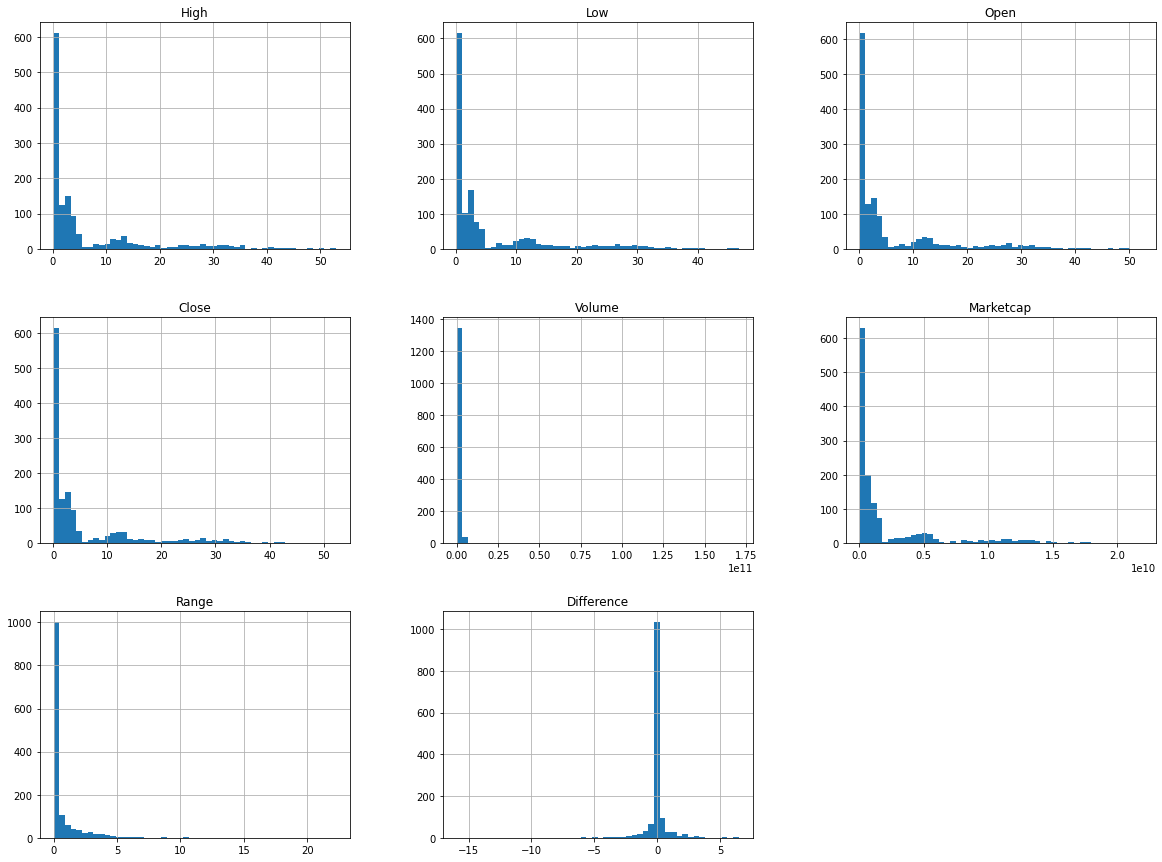

In [9]:
data[['High','Low','Open','Close','Volume','Marketcap','Range','Difference']].hist(bins=50, figsize = (20, 15))
plt.show();

In [10]:
#Days with the biggest price loss
data[['Date', 'Difference']].sort_values(by='Difference').head(10).T

,1336,1329,1327,1251,1338,1332,1369,1311,1345,1294
Date,2021-05-19 23:59:59,2021-05-12 23:59:59,2021-05-10 23:59:59,2021-02-23 23:59:59,2021-05-21 23:59:59,2021-05-15 23:59:59,2021-06-21 23:59:59,2021-04-24 23:59:59,2021-05-28 23:59:59,2021-04-07 23:59:59
Difference,-15.935869,-7.807006,-5.778995,-5.722529,-5.105589,-5.049621,-4.243033,-4.022362,-3.705899,-3.615878


In [11]:
# Days with the biggest price gain
data[['Date', 'Difference']].sort_values(by='Difference', ascending=False).head(10).T

,1341,1343,1301,1335,1348,1337,1322,1321,1326,1056
Date,2021-05-24 23:59:59,2021-05-26 23:59:59,2021-04-14 23:59:59,2021-05-18 23:59:59,2021-05-31 23:59:59,2021-05-20 23:59:59,2021-05-05 23:59:59,2021-05-04 23:59:59,2021-05-09 23:59:59,2020-08-12 23:59:59
Difference,6.488431,6.437064,5.930845,5.443284,5.254476,4.454036,3.919775,3.63232,3.578484,3.523765


In [12]:
fig = px.line(data, x='Date', y="Close")
fig.show();

In [17]:
fig = px.line(data, x='Date', y="Marketcap")
fig.show();

In [14]:
fig = px.line(data, x='Date', y="Difference")
fig.show();

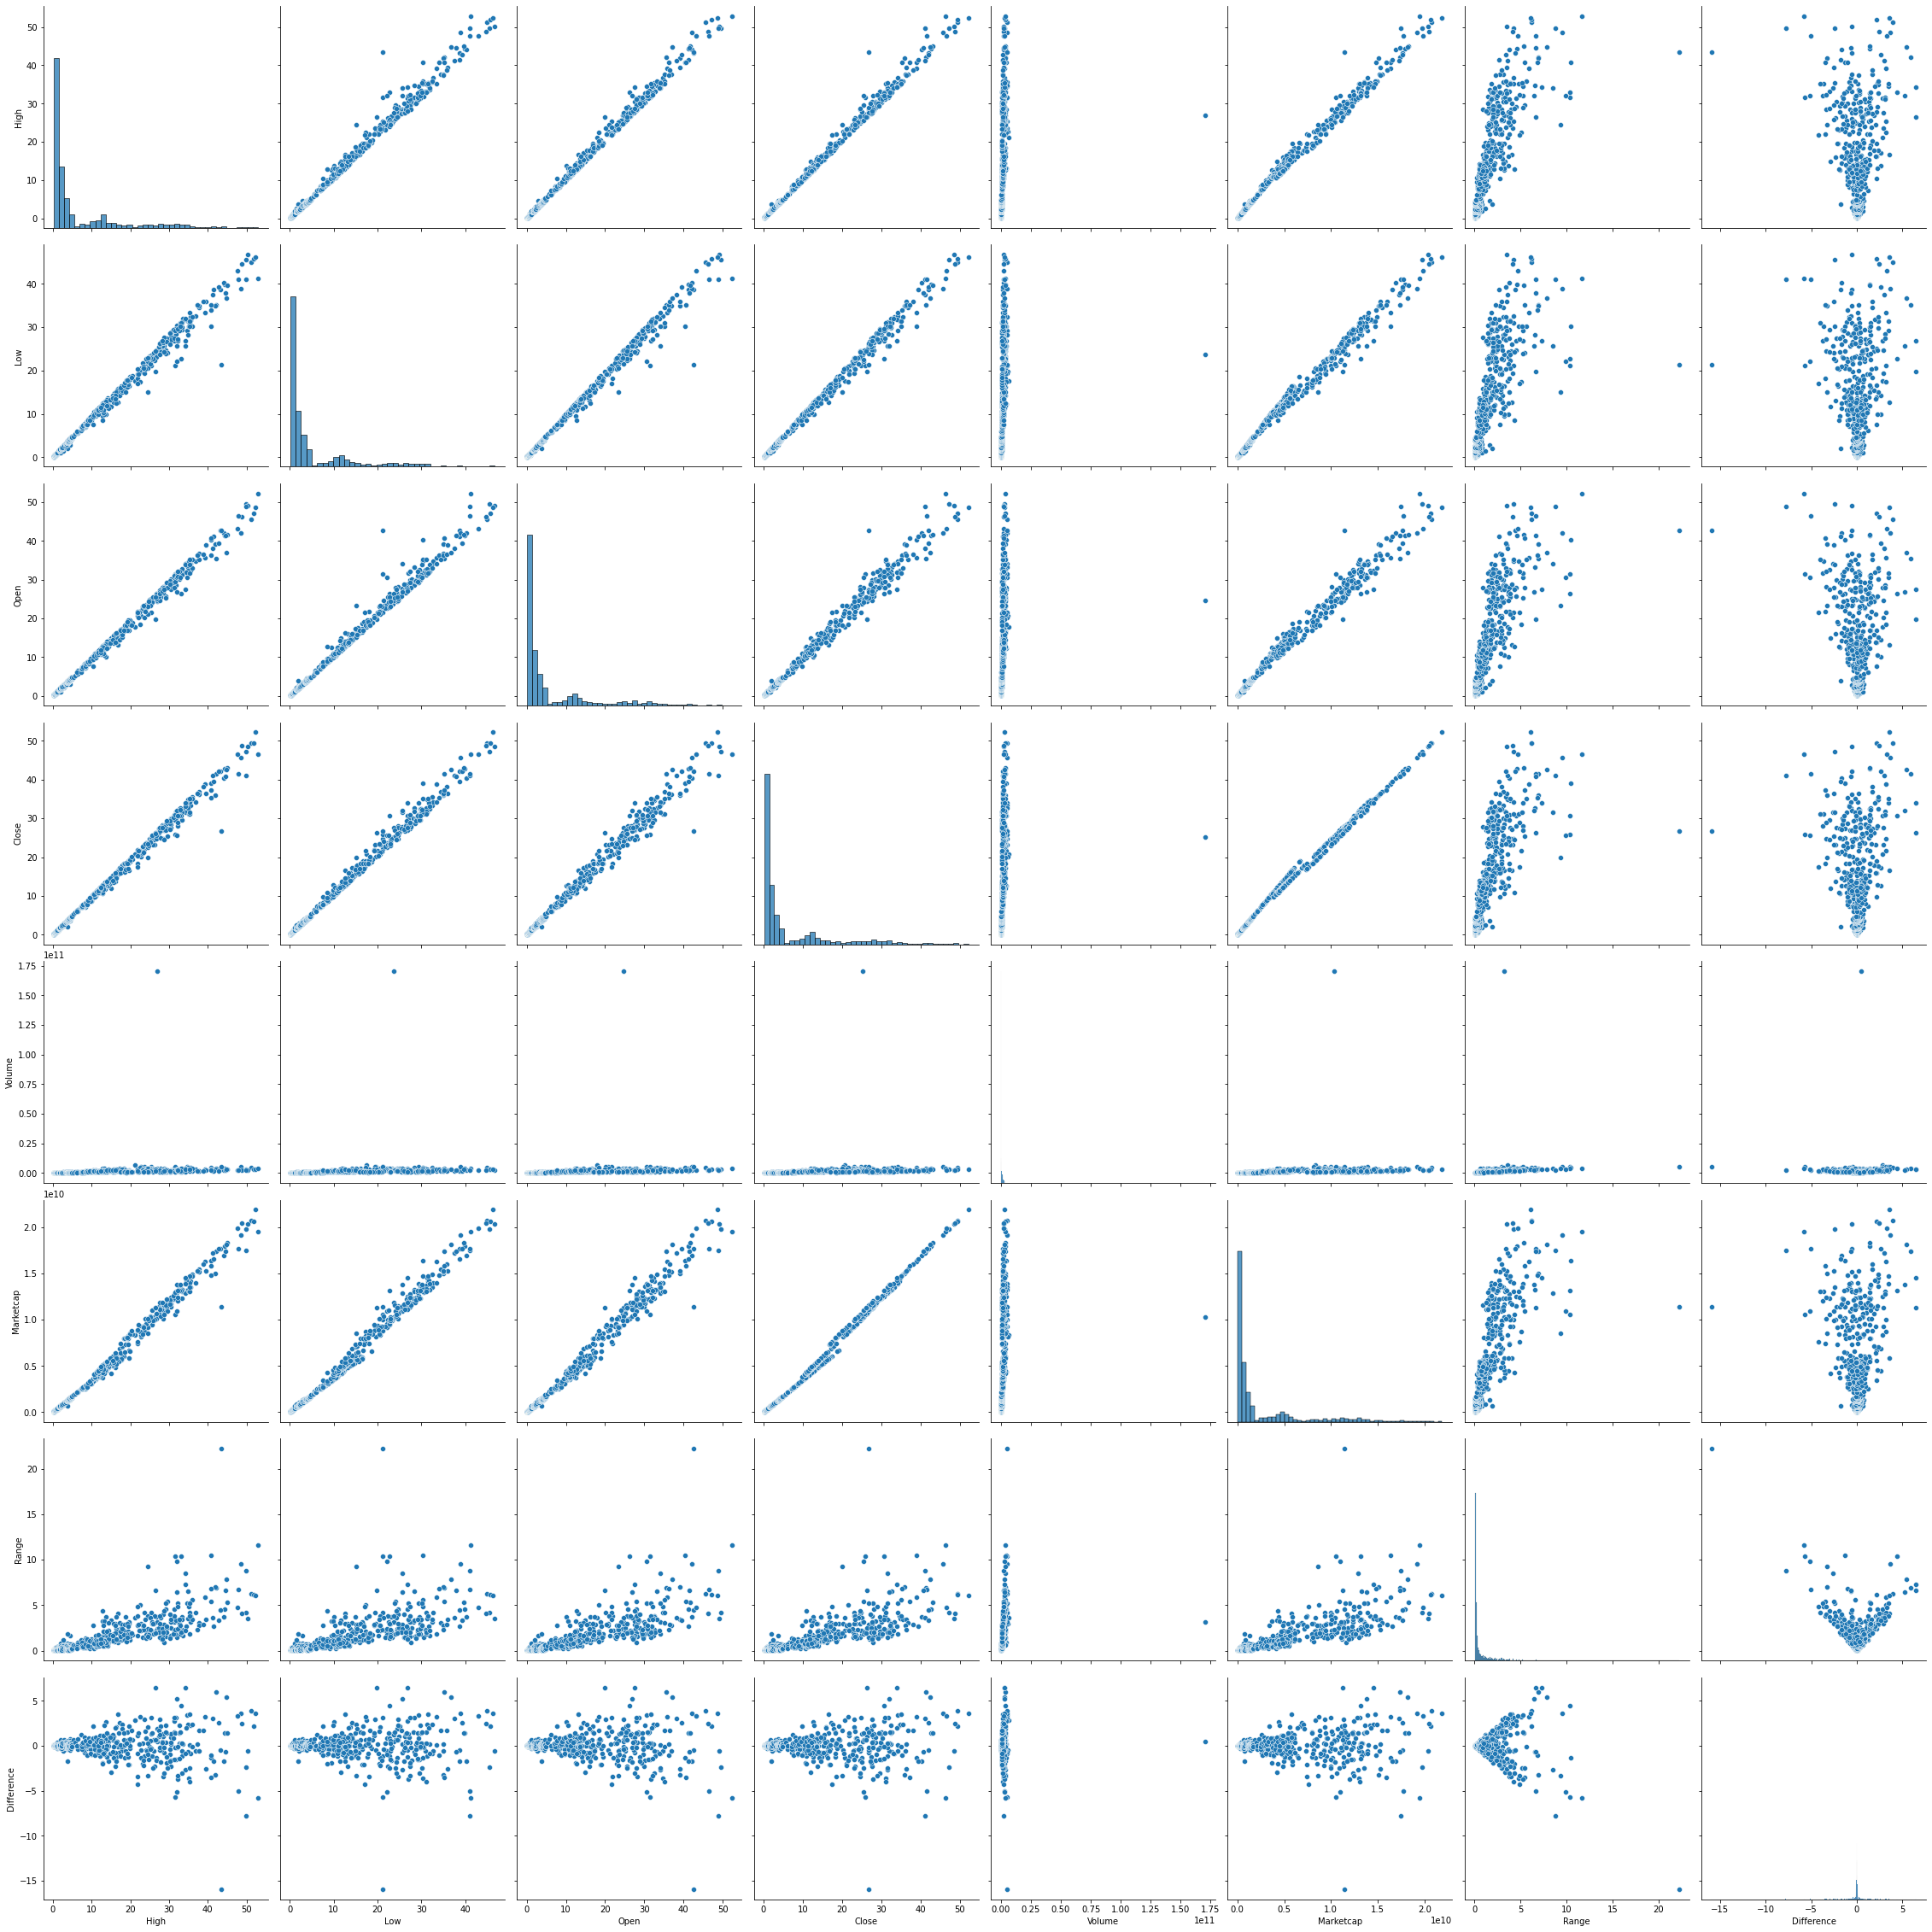

In [15]:
sns.pairplot(data,height=4);
